#Keyboard Glove
####By: Ron Shabtai


------------

###**Disclaimer!!**
This notebook needs to be executed in path `glove/training program/` in order to run correctly. 

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from random import randint
from sklearn.metrics import confusion_matrix

2023-03-20 02:34:39.345109: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 02:34:42.005519: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-20 02:34:42.005669: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-20 02:34:42.005676: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

##Data Initialization:

In [ ]:
#Loading the data format.
#The training program saves the data in json format but without the starting and
#closing bracket of a list, and because of that, we need to do so ourselves.
import json
file = open("data.json", 'r')
data_for_json = "["+file.read()[:-2]+"]"
data = json.loads(data_for_json)

In [ ]:
#Dictionary for converting the letters into numbers, called the Shabtai ABC Mastertable after my own name B).
abc = " abcdefghijklmnopqrstuvwxyz."
SHABTAI_ABC_MASTERTABLE = {}
for i in range(len(abc)):
    SHABTAI_ABC_MASTERTABLE[abc[i]] = i 
print(SHABTAI_ABC_MASTERTABLE)

{' ': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 27}


In [ ]:
#splitting between X and y, and throwing away unneeded garbage.
def list_to_dataset(data, discarded_characters=[]):
    X = []
    y = []
    for i in data:
        if i[0] in discarded_characters:
            continue
        X.append(i[1:])
        y.append(i[0])
    return X, y

In [ ]:
X, y = list_to_dataset(data, discarded_characters=[',', '-', '!', "'", ';', ':', '’', '?'])

In [ ]:
#number of examples.
len(X)

8120

In [ ]:
#print out the longest time stamp.
maxlen = 0
for i in X:
    #print(i)
    maxlen = max(len(i), maxlen)
print(maxlen)

11


In [ ]:
indx = randint(0, len(X))
print(X[indx])
print(y[indx])

[[-5.90625, -53.655, -83.2825, -0.48439, 0.644551, 0.378918], [38.465, 17.22875, 39.48875, -0.660176, 0.541032, 0.246101], [-93.2575, 73.675, 100.1175, -0.34376, 0.429701, 0.675802], [-190.46125, -45.01, -142.02125, -0.388684, -0.039064, 1.056673], [96.39, -20.18625, -40.8625, -0.56447, 0.195318, 0.5215]]
c


##Data Preperation:

In [ ]:
X_padded = [] #add padding to the data to fill to the biggest time stamp.
for i in X:
    X_padded.append(i + [[0.0]*6] * (maxlen-len(i)))
X_padded = np.array(X_padded) #now that the shape is constant, data can be a numpy
X_padded

array([[[ 3.3337500e+01,  2.2277500e+01, -2.9225000e+01, -6.0548700e-01,
          7.4416300e-01,  2.2266300e-01],
        [ 3.0152500e+01,  8.9250000e+00, -4.8387500e+00, -1.0273750e+00,
          6.1525300e-01, -2.8125900e-01],
        [-1.4955500e+02, -2.2610000e+01,  1.5647625e+02, -1.5820800e-01,
          5.8600000e-03,  5.0392200e-01],
        ...,
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00]],

       [[ 2.8498750e+01,  2.3975000e+01, -1.8200000e+01, -6.6017600e-01,
          7.7150800e-01,  1.1133200e-01],
        [ 1.5688750e+01,  5.6918750e+01,  7.4830000e+01, -6.5041000e-01,
          5.0978100e-01,  1.5039500e-01],
        [-2.8532000e+02, -1.1270000e+01, -2.1699125e+02, -3.18369

In [ ]:
X_padded.shape

(8120, 11, 6)

In [ ]:
#used for debugging, looking for any character that is not meant to be in the dataset.
for i in y:
    if i not in SHABTAI_ABC_MASTERTABLE:
        print(i)

In [ ]:
#turn the y into a softmaxed format.
y_numbered = [SHABTAI_ABC_MASTERTABLE[i] for i in y]
y_softmaxed = np.array([[0]*28]*len(y_numbered))
for i in range(y_softmaxed.shape[0]):
    y_softmaxed[i][y_numbered[i]] = 1
y_softmaxed

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
#better visualization of y.
for i in y_softmaxed:
    print(i)

Streaming output truncated to the last 5000 lines.
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 

In [ ]:
#training and validation split.
val_num = 280
X_val = X_padded[-val_num:]
X_training = X_padded[:-val_num]
y_val = y_softmaxed[-val_num:]
y_training = y_softmaxed[:-val_num]
print(X_val.shape, X_training.shape, y_val.shape, y_training.shape)

(280, 11, 6) (7840, 11, 6) (280, 28) (7840, 28)


##Model Preperation and Training

In [ ]:
#early stopping so the model wont overfit.
callback = tf.keras.callbacks.EarlyStopping('val_accuracy', 
                                            patience=10000, 
                                            restore_best_weights=True)

In [ ]:
input_shape = (X_padded.shape[1], X_padded.shape[2])
print(input_shape)

(11, 6)


In [ ]:
#choose which model to run.
model_to_run = "LSTM"

In [ ]:
#this was the first model, but due to lack of support of GRU in tflmicro i changed it into LSTM.
if model_to_run == "GRU":
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=input_shape, name='input'),
        tf.keras.layers.GRU(72, return_sequences=True, time_major=False),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.GRU(64, return_sequences=False),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(28, activation="softmax")
    ])

In [ ]:
#the new model.
if model_to_run == "LSTM":
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=input_shape, name='input'),
        tf.keras.layers.LSTM(48, return_sequences=False, time_major=False),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(28, activation="softmax")
    ])

2023-03-20 02:34:45.069268: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-20 02:34:45.322569: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-20 02:34:45.322760: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-20 02:34:45.324346: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 48)                10560     
                                                                 
 dropout (Dropout)           (None, 48)                0         
                                                                 
 dense (Dense)               (None, 32)                1568      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 28)                924       
                                                                 
Total params: 13,052
Trainable params: 13,052
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss="CategoricalCrossentropy",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_training, 
          y_training, 
          validation_data=(X_val, y_val),
          batch_size=32, 
          epochs=10000, #10000 epochs because the model is so lightweight and it runs so fast it doesnt matter. plus there is early stopping anyways.
          steps_per_epoch=20, 
          callbacks=[callback],
          verbose=2)

Epoch 1/10000


2023-03-20 02:34:50.320109: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8800
2023-03-20 02:34:50.636050: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f3f580292e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-20 02:34:50.636077: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1070, Compute Capability 6.1
2023-03-20 02:34:50.676956: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-20 02:34:51.111115: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Streaming output truncated to the last 5000 lines.
Epoch 7501/10000
20/20 - 0s - loss: 0.0331 - accuracy: 0.9891 - val_loss: 0.8340 - val_accuracy: 0.9036 - 86ms/epoch - 4ms/step
Epoch 7502/10000
20/20 - 0s - loss: 0.0355 - accuracy: 0.9891 - val_loss: 0.8066 - val_accuracy: 0.9036 - 89ms/epoch - 4ms/step
Epoch 7503/10000
20/20 - 0s - loss: 0.0259 - accuracy: 0.9922 - val_loss: 0.7753 - val_accuracy: 0.9107 - 88ms/epoch - 4ms/step
Epoch 7504/10000
20/20 - 0s - loss: 0.0471 - accuracy: 0.9828 - val_loss: 0.7424 - val_accuracy: 0.9071 - 86ms/epoch - 4ms/step
Epoch 7505/10000
20/20 - 0s - loss: 0.0378 - accuracy: 0.9906 - val_loss: 0.7616 - val_accuracy: 0.9107 - 84ms/epoch - 4ms/step
Epoch 7506/10000
20/20 - 0s - loss: 0.0179 - accuracy: 0.9937 - val_loss: 0.7517 - val_accuracy: 0.9071 - 89ms/epoch - 4ms/step
Epoch 7507/10000
20/20 - 0s - loss: 0.0309 - accuracy: 0.9906 - val_loss: 0.7805 - val_accuracy: 0.9071 - 86ms/epoch - 4ms/step
Epoch 7508/10000
20/20 - 0s - loss: 0.0637 - accuracy

##Performance Evaluation:

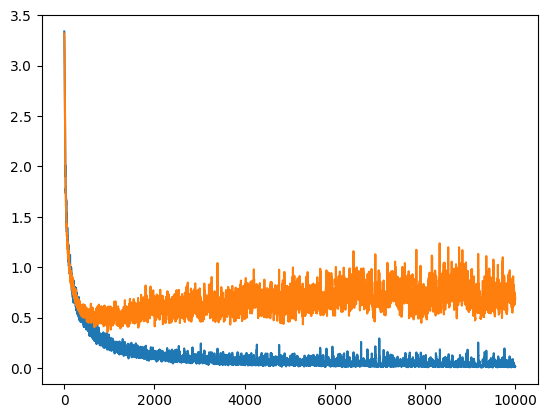

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

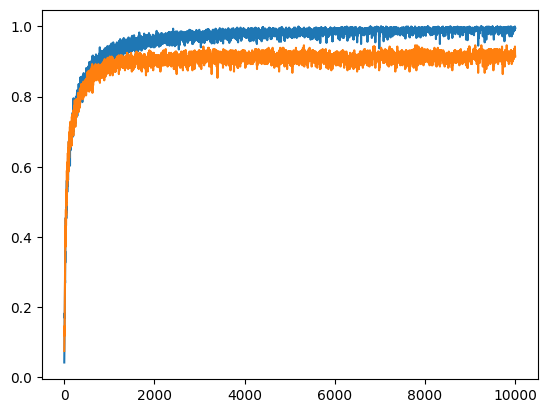

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [ ]:
#originally i also had precision but it interfered with conversion to tf lite.
#plt.plot(history.history["precision"])
#plt.plot(history.history["val_precision"])

In [ ]:
y_pred = model.predict(X_val)
print(confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1)))

9/9 [==============================] - 0s 2ms/step
[[10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  9  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  1  0]
 [ 0  0  0  0  9  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  1  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  8  0  1  0  0  0  0  0  0  1  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  3  7  0  0  0  0  0  0  0  0 

In [ ]:
indx = randint(0, X_training.shape[0])
print(np.argmax(y_training[indx]))
value = model.predict(np.expand_dims(X_training[indx], axis=0))
print(np.argmax(value))

18
1/1 [==============================] - 0s 19ms/step
18


In [ ]:
model.evaluate(X_training, y_training)
model.evaluate(X_val, y_val)

9/9 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.9143


[0.6855769753456116, 0.9142857193946838]

##Model Conversion and Saving:

In [ ]:
#define input and output shapes as signatures using a concrete function.
run_model = tf.function(lambda x: model(x))
concrete_func = run_model.get_concrete_function(
    tf.TensorSpec([1, maxlen, 6], model.inputs[0].dtype))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
model.save("./model_"+model_to_run, save_format='tf', signatures=concrete_func)

INFO:tensorflow:Assets written to: ./model_LSTM/assets


INFO:tensorflow:Assets written to: ./model_LSTM/assets


In [ ]:
#convert to tflite
converter = tf.lite.TFLiteConverter.from_saved_model('./model_'+model_to_run)
tflitemodel = converter.convert()

2023-03-20 02:51:15.999127: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-03-20 02:51:15.999147: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-03-20 02:51:15.999947: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: ./model_LSTM
2023-03-20 02:51:16.014221: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-03-20 02:51:16.014245: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: ./model_LSTM
2023-03-20 02:51:16.060812: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2023-03-20 02:51:16.070314: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2023-03-20 02:51:16.156785: I tensorflow/cc/saved_model/loader.cc:213] Running initialization op on SavedModel bundle at path: ./model_LSTM
2023-03-20 02:51:16

In [ ]:
#check that the model is still accurate after conversion.
interperter = tf.lite.Interpreter(model_content=tflitemodel)
interperter.allocate_tensors()
input_details = interperter.get_input_details()
output_details = interperter.get_output_details()

print(input_details)
print(output_details)

for i in range(X_val.shape[0]):
    expected = model.predict(X_val[i:i+1])
    interperter.set_tensor(input_details[0]["index"], X_val[i:i+1, :, :].astype('float32'))
    interperter.invoke()
    result = interperter.get_tensor(output_details[0]["index"])

    np.testing.assert_almost_equal(expected, result, decimal=5)
    interperter.reset_all_variables() #reset lstm inner variables.

print("model is fine")

[{'name': 'serving_default_x:0', 'index': 0, 'shape': array([ 1, 11,  6], dtype=int32), 'shape_signature': array([ 1, 11,  6], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:0', 'index': 26, 'shape': array([ 1, 28], dtype=int32), 'shape_signature': array([ 1, 28], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
1/1 [==============================] - 0s 15ms/step


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


1/1 [==============================] - 0s 15ms/step
model is fine


In [ ]:
open("model_"+model_to_run+".tflite", 'wb').write(tflitemodel)

56104

In [ ]:
tf.lite.experimental.Analyzer.analyze(model_content=tflitemodel, gpu_compatibility=False)

=== TFLite ModelAnalyzer ===

Your TFLite model has '1' subgraph(s). In the subgraph description below,
T# represents the Tensor numbers. For example, in Subgraph#0, the UNIDIRECTIONAL_SEQUENCE_LSTM op takes
tensor #0 and tensor #15 and tensor #14 and tensor #13 and tensor #12 and tensor #7 and tensor #6 and tensor #5 and tensor #4 and tensor #-1 and tensor #-1 and tensor #-1 and tensor #11 and tensor #10 and tensor #9 and tensor #8 and tensor #-1 and tensor #-1 and tensor #1 and tensor #21 and tensor #-1 and tensor #-1 and tensor #-1 and tensor #-1 as input and produces tensor #22 as output.

Subgraph#0 main(T#0) -> [T#26]
  Op#0 UNIDIRECTIONAL_SEQUENCE_LSTM(T#0, T#15, T#14, T#13, T#12, T#7, T#6, T#5, T#4, T#-1, T#-1, T#-1, T#11, T#10, T#9, T#8, T#-1, T#-1, T#1, T#21, T#-1, T#-1, T#-1, T#-1) -> [T#22]
  Op#1 STRIDED_SLICE(T#22, T#18[0, -1, 0], T#19[0, 0, 0], T#20[1, 1, 1]) -> [T#23]
  Op#2 FULLY_CONNECTED(T#23, T#16, T#3) -> [T#24]
  Op#3 FULLY_CONNECTED(T#24, T#17, T#2) -> [T#25]
  O

In [ ]:
!xxd -i {"model_"+model_to_run+".tflite"} > "model.cc"